In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('D:/Data Science/Symbiosis/Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size = 0.2,random_state=0)

In [12]:
#Random Forest,GausianNB,Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
estimators=[("rf",RandomForestClassifier(n_estimators=100)),("GNB",GaussianNB()),("lr",LogisticRegression(class_weight="balanced"))]

In [13]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=estimators,voting="soft")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is: 0.8051948051948052
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



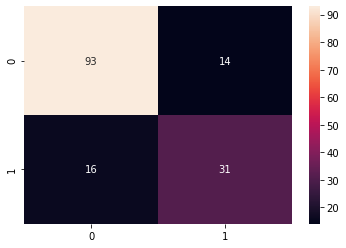

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is:",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [17]:
model=pd.DataFrame({"Actual":ytest,"Predicted":ypred})

In [20]:
model.head(100)

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
572,0,0
638,1,0
608,0,1
39,1,1


In [21]:
#Stacking Classifier
from sklearn.ensemble import StackingClassifier
base_model=[("rf",RandomForestClassifier(n_estimators=100)),("GNB",GaussianNB())]
final_model=LogisticRegression()
model=StackingClassifier(estimators=base_model,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8051948051948052
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



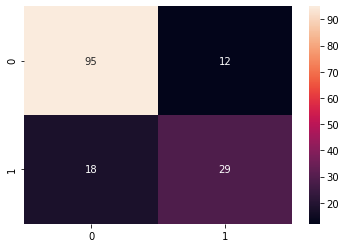

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is:",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
base_model=[("rf",RandomForestClassifier(n_estimators=100)),("GNB",GaussianNB()),("DT",DecisionTreeClassifier())]
final_model=LogisticRegression() #Final Model=Logisctic Regression ch Ghyaychee best accuracy sathi IMP ahe 
model=StackingClassifier(estimators=base_model,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8116883116883117
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



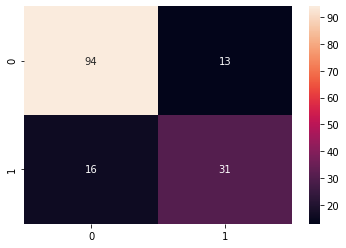

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is:",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [25]:
from sklearn.linear_model import LinearRegression,Ridge,ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
base_model=[("ridge",Ridge()),("ElasticNet",ElasticNetCV()),("svr",SVR())]
final_model=LinearRegression() #Final Model=Linear Regression ch Ghyaychee best accuracy sathi IMP ahe 
model=StackingRegressor(estimators=base_model,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)


In [27]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)


0.3391810266364389